## Python Libraries

In [1]:
# Importing the packages
import plotly.express as px
import pandas as pd

## Data

In [2]:
# Loading and displaying the data
tableRes = pd.read_csv('../../data/exergamewf.csv')

tableRes["Participants"] = "Participants" # in order to have a single root node
tableRes["ppt"] = tableRes["iSubj"].astype(str)
tableRes["strial"] = tableRes["trial"].astype(str)
tableRes.head()

,iSubj,trial,Age,Decade,medLrms51,medTI51,medK,meanK,medSpeed,medTIms51,medLcovD51,medLsd51,medLcov51,medLrmslD51,medLsdD51,older,Participants,ppt,strial
0,1,1,76,7,0.189493,0.589529,207.800939,333.861515,0.488721,0.806345,0.744766,0.020602,0.108687,1.259172,0.129068,True,Participants,1,1
1,1,2,76,7,0.204152,0.697338,223.294322,319.601546,0.518278,0.775451,0.506944,0.016446,0.078140,1.263366,0.105902,True,Participants,1,2
2,1,3,76,7,0.217347,0.786131,136.400753,272.460861,0.584193,0.511902,0.706127,0.047372,0.236467,0.782796,0.133917,True,Participants,1,3
3,1,4,76,7,0.169569,1.020695,162.034626,289.927862,0.590151,0.416398,0.701803,0.039017,0.265361,0.487570,0.108637,True,Participants,1,4
4,1,5,76,7,0.170786,0.769747,141.767674,300.625818,0.551706,0.550029,0.753161,0.036798,0.235907,0.646194,0.119610,True,Participants,1,5


## Plot

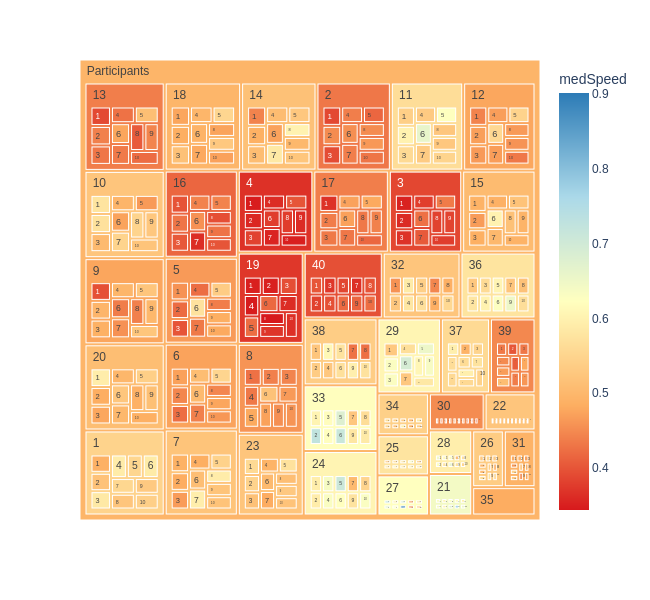

In [3]:
fig = px.treemap(tableRes, path=['Participants', 'iSubj', 'trial'], values='Age',
                   color='medSpeed', 
#                 hover_data=['Age'],
#                 Try a diverging color scale,
#                 color_continuous_scale=['#bdd7e7','#6baed6','#3182bd','#08519c']
                 color_continuous_scale=['#d7191c','#fdae61','#ffffbf','#abd9e9','#2c7bb6']
                 
                  #color_continuous_midpoint=np.average(df['lifeExp'], weights=df['pop'])
                )
fig.update_layout(
    autosize=False,width=1200,height=600);

fig.show()

## Sorting the treemap

In [4]:
table_sorted = tableRes.sort_values(["iSubj"])

In [5]:
fig2 = px.treemap(table_sorted, path=['Participants', 'iSubj', 'trial'], values='Age',
                   color='medSpeed', 
                 color_continuous_scale=['#d7191c','#fdae61','#ffffbf','#abd9e9','#2c7bb6']
                )
fig2.update_traces(sort=False)

fig2.update_layout(
    autosize=False,width=1200,height=600);

fig2.show()

## Explanation of the `sorting` feature


- Plotly treemap auto-sorts siblings (branches) by aggregated size/value by default, so largest sectors appear first.
- You can disable that behavior with fig.update_traces(sort=False) to preserve the input order Plotly receives.
- px.treemap constructs the tree from your DataFrame rows in sequence; if sort=False, that row order (after any internal aggregation) determines sibling order.
- Sorting the DataFrame (df.sort_values(...)) reorders the input rows so when sort=False the treemap preserves that order; ascending=True is the default.
- If multiple rows map to the same node, internal aggregation can make the preserved order depend on the first occurrence — for deterministic results, pre-aggregate (groupby + sum) or use category_orders.
- For exact control, either (a) pass category_orders to px.treemap or (b) build the trace with graph_objects.Treemap and supply labels/parents in the precise sequence you want.
